<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# HW: Stochastics: Brownian Motion

## due 2023-02-06 ##

HW submission by group (up to 4 people)
* Yu-Ching Liao <ycliao3@illinois.edu>
* Hariharan Manickam <hm32@illinois.edu>

## imports and graphics configurations

In [82]:
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter

from numpy import exp, sqrt

import warnings
warnings.filterwarnings("ignore")

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")
    
def legend(pos="bottom",ncol=3):
    if pos=="bottom":
        plt.legend(bbox_to_anchor=(0.5,-0.2), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)
        
def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [143]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":2,
}
plt.rcParams.update(params)

# **Brownian Motion** #

## Question 1 

**Scaled Random Walk** Let $S$ be a simple random walk (up or down by 1 with probability 0.5).
Empirically compute the distribution of
* $S_{50}/\sqrt{10}$
* $S_{100}/\sqrt{20}$
* $S_{250}/\sqrt{50}$

In [115]:
def final_position(n_steps):
    position = 0
    for i in range(n_steps):
        U = np.random.uniform()
        if U > 0.5:
            position += 1
        else: 
            position -= 1
    return position

In [140]:
l50, l100, l250 = [], [], []
for i in range(50000):
    l50.append(final_position(50)/sqrt(10))
    l100.append(final_position(100)/sqrt(20))
    l250.append(final_position(250)/sqrt(50))
l50 = np.array(l50)
l100 = np.array(l100)
l250 = np.array(l250)

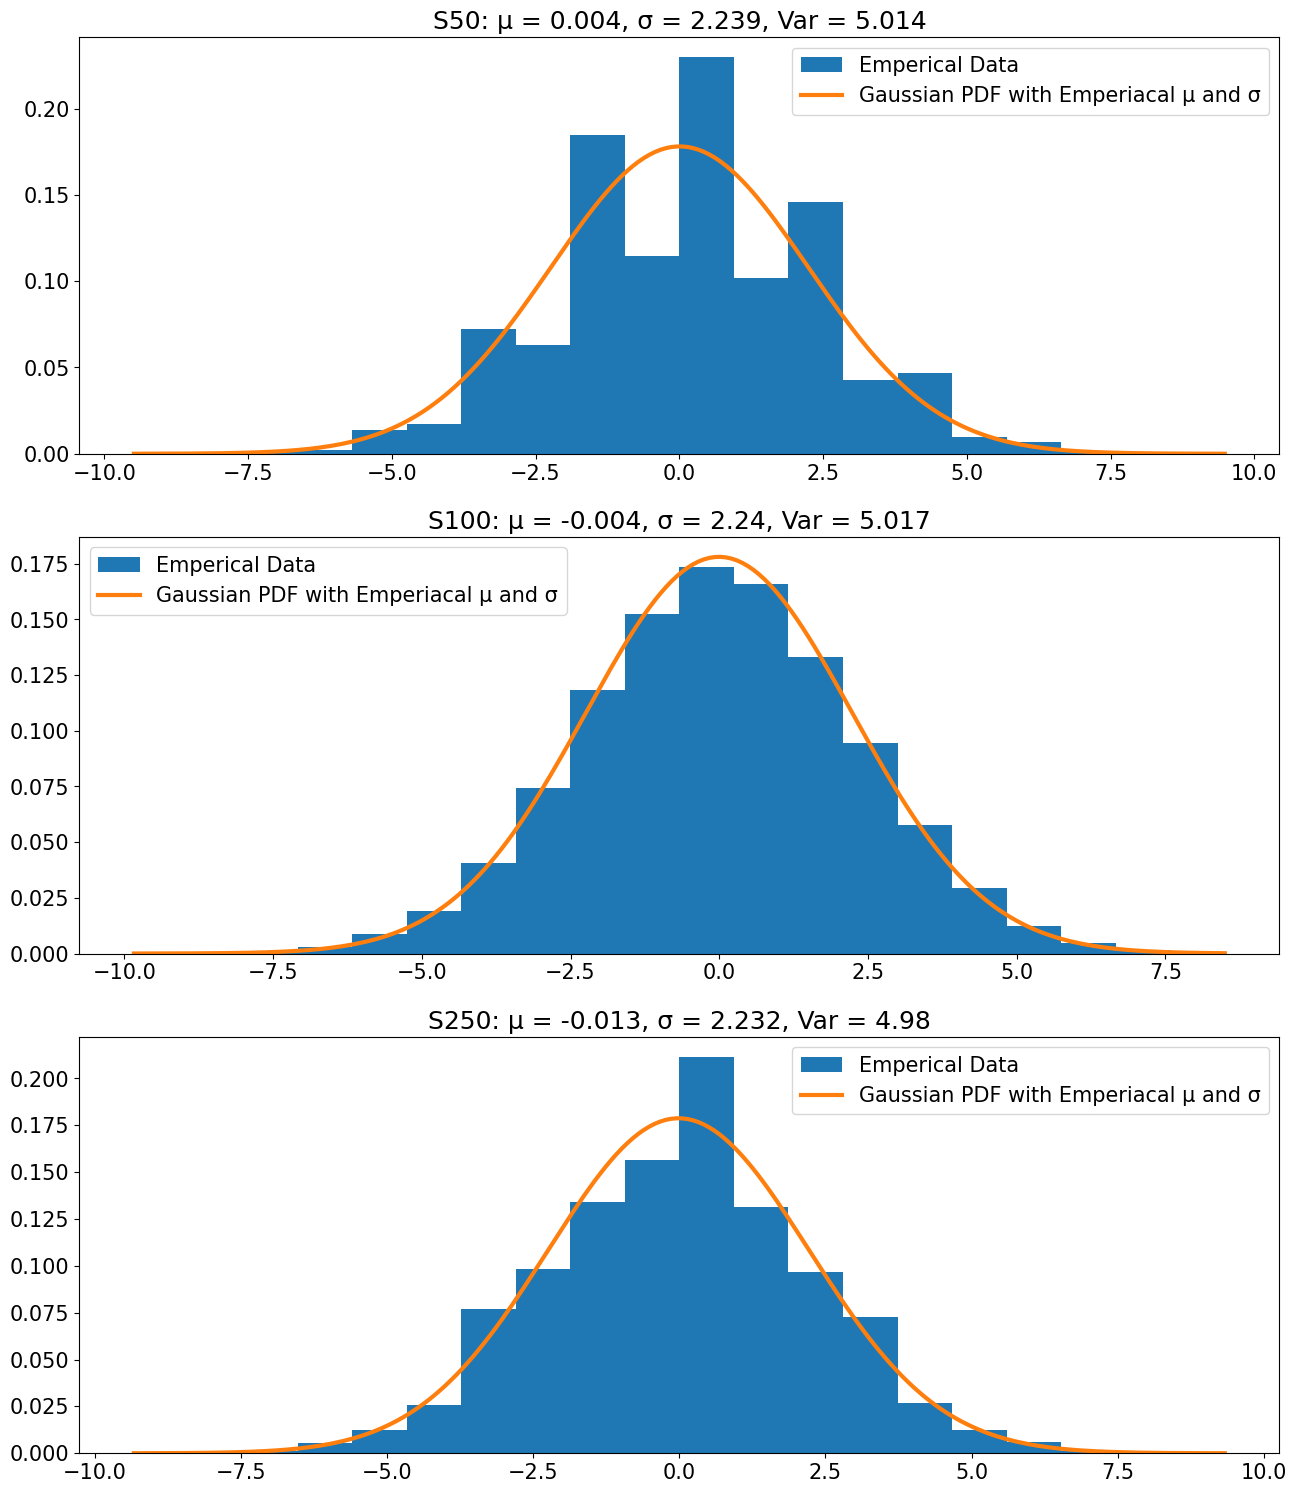

In [146]:
fig, (axs1, axs2, axs3) = plt.subplots(3)

axs1.hist(l50, density=True, label = "Emperical Data", bins = 20)
μ50 = l50.mean()
σ50 = l50.std()
t50 = "S50: " + "μ = " + str(round(μ50, 3)) + ", σ = " + str(round(σ50, 3)) + ", Var = " + str(round(σ50**2, 3))
axs1.set_title(t50)
x50 = np.linspace(l50.min(), l50.max(), 200)
axs1.plot(x50, scipy.stats.norm.pdf(x50, loc = l50.mean(), scale = l50.std())
          , label = "Gaussian PDF with Emperiacal μ and σ")
axs1.legend()

axs2.hist(l100, density=True, label = "Emperical Data", bins = 20)
μ100 = l100.mean()
σ100 = l100.std()
t100 = "S100: " + "μ = " + str(round(μ100, 3)) + ", σ = " + str(round(σ100, 3)) + ", Var = " + str(round(σ100**2, 3))
axs2.set_title(t100)
x100 = np.linspace(l100.min(), l100.max(), 200)
axs2.plot(x100, scipy.stats.norm.pdf(x100, loc = l100.mean(), scale = l100.std())
          , label = "Gaussian PDF with Emperiacal μ and σ")
axs2.legend()

axs3.hist(l250, density=True, label = "Emperical Data", bins = 20)
μ250 = l250.mean()
σ250 = l250.std()
t250 = "S250: " +"μ = " + str(round(μ250, 3)) + ", σ = " + str(round(σ250, 3))  + ", Var = " + str(round(σ250**2, 3))
axs3.set_title(t250)
x250 = np.linspace(l250.min(), l250.max(), 200)
axs3.plot(x250, scipy.stats.norm.pdf(x250, loc = l250.mean(), scale = l250.std())
          , label = "Gaussian PDF with Emperiacal μ and σ")
axs3.legend()

plt.subplots_adjust(bottom=0.05, right=2, top=3)
plt.show()

**Conclusion:** $S_{50}$, $S_{100}$ and $S_{250}$ are all Gaussian with APPROXIMATE $μ = 0$ and $σ^2 = 5$. 

## Question 2 

**Brownian Area:**  Let $W$ be a Brownian motion starting at 1 and define
$$ \tau = \inf\{t>0: W_t<0\}$$
Compute the density of
$$ A = \int_{s=0}^{\tau}W_sds$$

In [14]:
import numpy as np
import pandas as pd
from numpy import exp, log, sqrt 
import scipy
import matplotlib.pyplot as plt
from scipy.stats import binom

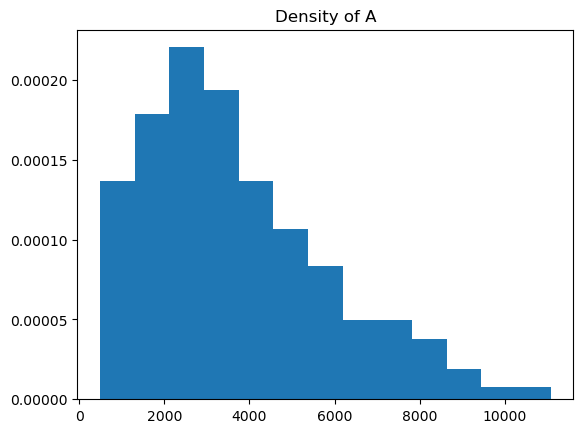

In [184]:
T = 1
N_samples = 1000
SEED = 0
δ = 1e-4
index = np.arange(0, T, step=δ)
movement = 2 * scipy.stats.bernoulli.rvs(
    0.5, size=(len(tvals), N_samples), random_state=SEED) - 1
movement[0, :] = 0  #force RW to start at one
position = pd.DataFrame(movement, index=index) * np.sqrt(δ)
S = position.cumsum(axis='index') + 1

pathes = list(S.columns)  #the number of path
As = []  #getting all As so that we can plot out
Ts = []

for path in pathes:  #check if it achieve 0
    A = 0  #integration is summation
    l = list(S[path])  #using list is easier to indexing
    for τ in range(len(l)):
        if l[τ] >= 0:  #if Brownian Motion did not achieve "< 0", add to the integration
            A += l[τ]
        else:
            Ts.append(τ)
            break  #if Brownian Motion achieve 0, break and go with next path.
    if τ != 9999:  #incase that this dataset do not achieve 0 eventually.
        As.append(A)

plt.title("Density of A")
plt.hist(As, bins="auto", density=True)
plt.show()

<function ndarray.std>